In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

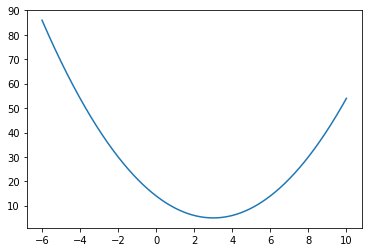

In [3]:
def parabola(x):
    return (x-3)**2 + 5
xplot = np.linspace(-6,10,1000)
yplot = parabola(xplot)
plt.plot(xplot,yplot)

In [4]:
result = opt.minimize(parabola,[0])

In [5]:
print(result)

      fun: 5.000000000000001
 hess_inv: array([[0.5]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([3.00000003])


In [6]:
print("The function is minimized at x={}, f(x)={}".format(result.x[0],result.fun))

The function is minimized at x=3.0000000283269603, f(x)=5.000000000000001


In [7]:
data = np.genfromtxt("datasets/current_vs_voltage.dat",skip_header=1)

In [8]:
print(data)

[[ 0.          0.        ]
 [ 0.5         0.02462258]
 [ 1.          0.03013747]
 [ 1.5         0.0735979 ]
 [ 2.          0.08889265]
 [ 2.5         0.12399148]
 [ 3.          0.14418374]
 [ 3.5         0.11710446]
 [ 4.          0.23149946]
 [ 4.5         0.20991612]
 [ 5.          0.28046081]
 [ 5.5         0.29488925]
 [ 6.          0.37416763]
 [ 6.5         0.31530116]
 [ 7.          0.27990944]
 [ 7.5         0.37675056]
 [ 8.          0.36338891]
 [ 8.5         0.49656263]
 [ 9.          0.43667777]
 [ 9.5         0.5557755 ]
 [10.          0.36119425]
 [10.5         0.57877457]
 [11.          0.52443137]
 [11.5         0.53537492]
 [12.          0.5242314 ]]


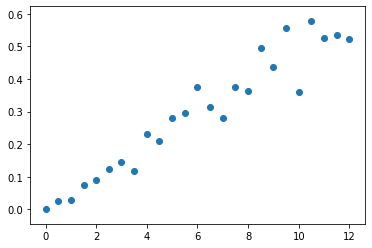

In [9]:
voltage = data[:,0]
current = data[:,1]
plt.scatter(voltage,current)

In [10]:
def residuals(R):
    s = 0
    for i in range(voltage.size):
        imeas = current[i]
        ipred = voltage[i] / R
        s += (imeas - ipred)**2
    return s

In [24]:
result = opt.minimize(residuals,[10])

In [25]:
print("The residuals are minimized at R={:.3f}".format(result.x[0]))

The residuals are minimized at R=20.519


In [26]:
#model
def current_func(V,R):
    return V/R

In [27]:
popt,pcov = opt.curve_fit(current_func,voltage,current)

In [28]:
print("The best-fit value for R is: {}".format(popt[0]))

The best-fit value for R is: 20.519067055737914


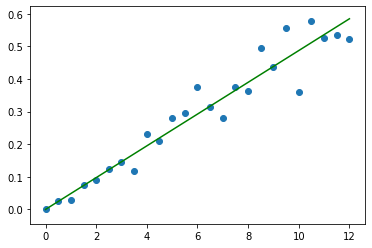

In [30]:
vplot = np.linspace(voltage.min(),voltage.max(),100)
yplot = current_func(vplot,popt[0])
plt.scatter(voltage,current)
plt.plot(vplot,yplot,c='green')

In [32]:
uncert = np.sqrt(np.diag(pcov))

In [33]:
print(uncert)

[0.59282835]


In [34]:
print("Best fit value is {:.2f}+-{:.2f}".format(popt[0],uncert[0]))

Best fit value is 20.52+-0.59
